#### Import The Libraries

In [1]:
import pandas as pd #used for data manipulation

import numpy as np #used for numerical analysis

from collections import Counter as c # return counts of number of classess

import matplotlib.pyplot as plt #used for data Visualization

import seaborn as sns #data visualization Library

import missingno as msno #finding missing values

from sklearn.metrics import accuracy_score, confusion_matrix#model performance

from sklearn.model_selection import train_test_split #splits data in random train and test array

from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features

from sklearn.linear_model import LogisticRegression #Classification ML algorithm

import pickle #Python object hierarchy is converted into a byte stream

#### Loading The DataSet

In [2]:
data = pd.read_csv("chronickidneydisease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


#### Droping the ID Column

In [5]:
data.drop(columns = ['id'] ,axis = 1 , inplace = True)

In [6]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

#### manually giving the name of the columns

In [7]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin','sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
                
                'bacteria','blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin',
                
                'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus',
                
                'coronary_artery_disease', 'appetite','pedal_edema', 'anemia', 'class'] 



In [8]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [9]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Understanding Data Type And Summary Of Features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [11]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [12]:
data['class'] = data['class'].replace('ckd\t' , 'ckd')
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [13]:
catcols = set(data.dtypes[data.dtypes =="O"].index.values)
print(catcols)

{'red_blood_cell_count', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'white_blood_cell_count', 'hypertension', 'bacteria', 'diabetesmellitus', 'packed_cell_volume', 'pus_cell_clumps', 'class', 'red_blood_cells', 'pus_cell'}


In [14]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns : red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

Columns : coronary_artery_disease
Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})
************************************************************************************************************************

Columns : appetite
Counter({'good': 317, 'poor': 82, nan: 1})
********************************************************************

#### Understanding Data Type And Summary Of Features

In [15]:
catcols.remove("red_blood_cell_count")
catcols.remove("white_blood_cell_count")
catcols.remove("packed_cell_volume")
print(catcols)


{'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'hypertension', 'bacteria', 'diabetesmellitus', 'pus_cell_clumps', 'class', 'red_blood_cells', 'pus_cell'}


In [16]:
contcols = set(data.dtypes[data.dtypes != 'O'].index.values)
print(contcols)

{'sodium', 'blood_urea', 'blood glucose random', 'albumin', 'sugar', 'age', 'specific_gravity', 'serum_creatinine', 'blood_pressure', 'potassium', 'hemoglobin'}


In [17]:
for i in contcols:
    print("Columns :" , i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns : sodium
Counter({135.0: 40, 140.0: 25, 141.0: 22, 139.0: 21, 142.0: 20, 138.0: 20, 137.0: 19, 136.0: 17, 150.0: 17, 147.0: 13, 145.0: 11, 132.0: 10, 146.0: 10, 131.0: 9, 144.0: 9, 133.0: 8, 130.0: 7, 134.0: 6, 143.0: 4, 127.0: 3, 124.0: 3, 114.0: 2, 125.0: 2, 128.0: 2, 122.0: 2, 113.0: 2, 120.0: 2, nan: 1, nan: 1, nan: 1, 111.0: 1, nan: 1, 104.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, 4.5: 1, nan: 1, 129.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 163.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 126.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 115.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

In [18]:
contcols.remove("specific_gravity")
contcols.remove("albumin")
contcols.remove("sugar")
print(contcols)

{'sodium', 'blood_urea', 'blood glucose random', 'age', 'serum_creatinine', 'blood_pressure', 'potassium', 'hemoglobin'}


#### Understanding Data Type and Summary of Features

In [19]:
# adding colums which we found continous

contcols.add("red_blood_cell_count")
contcols.add("white_blood_cell_count")
contcols.add("packed_cell_volume")
print(contcols)

{'red_blood_cell_count', 'sodium', 'blood_urea', 'white_blood_cell_count', 'blood glucose random', 'age', 'serum_creatinine', 'blood_pressure', 'packed_cell_volume', 'potassium', 'hemoglobin'}


In [20]:
# adding the columns which we found categorical

catcols.add("specific_gravity")
catcols.add("albumin")
catcols.add("sugar")
print(catcols)

{'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'albumin', 'hypertension', 'bacteria', 'diabetesmellitus', 'specific_gravity', 'sugar', 'pus_cell_clumps', 'class', 'red_blood_cells', 'pus_cell'}


In [21]:
data['coronary_artery_disease'].value_counts()

no      362
yes      34
\tno      2
Name: coronary_artery_disease, dtype: int64

In [22]:
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace("\tno","no")
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [23]:
data['diabetesmellitus'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetesmellitus, dtype: int64

In [24]:
data['diabetesmellitus'] = data['diabetesmellitus'].replace(to_replace={"\tno" : "no" ,"\tyes" : "yes"})


In [25]:
data['diabetesmellitus'] = data['diabetesmellitus'].str.strip()
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

#### Null Values

In [26]:
data.isna().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [27]:
data.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [28]:
data['packed_cell_volume']  = pd.to_numeric(data['packed_cell_volume'] ,errors= 'coerce')
data['red_blood_cell_count']  = pd.to_numeric(data['red_blood_cell_count'] ,errors= 'coerce')
data['white_blood_cell_count']  = pd.to_numeric(data['white_blood_cell_count'] ,errors= 'coerce')

#### Replacing the Missing Values

In [29]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)

data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace = True)

data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)

data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True) 

data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)

data['potassium'].fillna (data['potassium'].mean(), inplace=True)

data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)

data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)

data['sodium'].fillna(data['sodium'].mean(), inplace=True)

data['white_blood_cell_count'].fillna (data['white_blood_cell_count'].mean(), inplace=True)

In [30]:
data['age'].fillna(data['age'].mode()[0], inplace=True)

data['hypertension'].fillna (data['hypertension'].mode()[0], inplace=True)

data['pus_cell_clumps' ].fillna (data['pus_cell_clumps'].mode()[0],inplace=True)

data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)

data['albumin' ]. fillna (data['albumin' ].mode()[0], inplace=True)

data['pus_cell'].fillna(data['pus_cell'].mode()[0], inplace=True)

data['red_blood_cells'].fillna (data['red_blood_cells'].mode()[0], inplace=True)

data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)

data['bacteria' ].fillna(data['bacteria'].mode()[0], inplace=True)

data['anemia' ].fillna (data['anemia'].mode()[0],inplace=True)

data['sugar'].fillna (data['sugar'].mode()[0],inplace=True)

data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)

data['pedal_edema' ].fillna(data['pedal_edema' ].mode()[0],inplace=True)

data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

#### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("LABEL ENCODING OF :",i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i] = LEi.fit_transform(data[i])
    print(c(data[i]))
    print('*'*100)

LABEL ENCODING OF : coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
LABEL ENCODING OF : appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF : pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF : anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF : albumin
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
Counter({0: 245, 1: 44, 2: 43, 3: 43, 4: 24, 5: 1})
*****************************************************************************************

In [32]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


#### Splitting the Dataset into Dependent and Independent variable

In [33]:
selcols = ['red_blood_cells','pus_cell','blood glucose random','blood_urea',
           'pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x = pd.DataFrame(data,columns = selcols)
y = pd.DataFrame(data,columns = ['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


#### Split the dataset into Train set and Test set

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


## Model Building

### Logistic Regression.

In [35]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

C:\Users\SILAS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SILAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Test the Model

In [36]:
y_pred = lgr.predict(x_test)

In [37]:
print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0]


Counter({0: 48, 1: 32})

#### Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [39]:
d = accuracy_score(y_test,y_pred)*100
print(d)

92.5


In [40]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Yes","No"],index=["Yes","No"]))

     Yes  No
Yes   48   6
No     0  26


### Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

<ipython-input-41-0dbe9a369c88>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [42]:
predictions = rf.predict(x_test)

In [43]:
a = accuracy_score(y_test,predictions)*100
print(a)

95.0


In [44]:
print(pd.DataFrame(confusion_matrix(y_test,predictions),columns=["Yes","No"],index=["Yes","No"]))

     Yes  No
Yes   52   2
No     2  24


### Decision Tree 

In [45]:
from sklearn.tree import DecisionTreeClassifier
DET = DecisionTreeClassifier()
DET.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
Predictions = DET.predict(x_test)

In [47]:
b = accuracy_score(y_test,Predictions)*100
print(b)

91.25


In [48]:
print(pd.DataFrame(confusion_matrix(y_test,Predictions),columns=["Yes","No"],index=["Yes","No"]))

     Yes  No
Yes   51   3
No     4  22


### Support Vector Machine

In [49]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

C:\Users\SILAS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [50]:
Y_pred= classifier.predict(x_test)

In [51]:
c = accuracy_score(y_test,Y_pred)*100
print(c)

88.75


In [52]:
print(pd.DataFrame(confusion_matrix(y_test,Y_pred),columns=["Yes","No"],index=["Yes","No"]))

     Yes  No
Yes   45   9
No     0  26


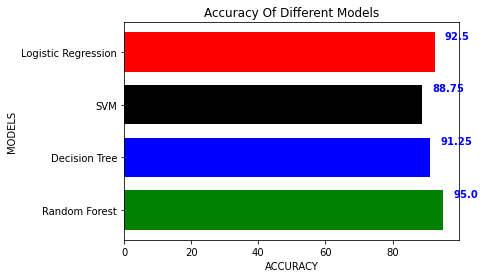

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
 
x=['Random Forest','Decision Tree','SVM','Logistic Regression']
y=np.array([a,b,c,d])

fig, ax = plt.subplots()
width = 0.75

 
ax.barh(x, y, width, color=[ 'green', 'blue', 'black', 'red'])
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.xlabel('ACCURACY')
plt.ylabel("MODELS")
plt.title('Accuracy Of Different Models')
plt.show()
